# 🧪 Analysis - SegResNet on BraTS Dataset.

## 📚 Import necessary libraries

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

# Define output directory
output_dir = Path("Outputs/SegResNet_brats_accelerate_20251009_060159")

## 📊 Data Split Analysis

Total samples: 369
Training samples: 295 (79.9%)
Validation samples: 18 (4.9%)
Test samples: 56 (15.2%)


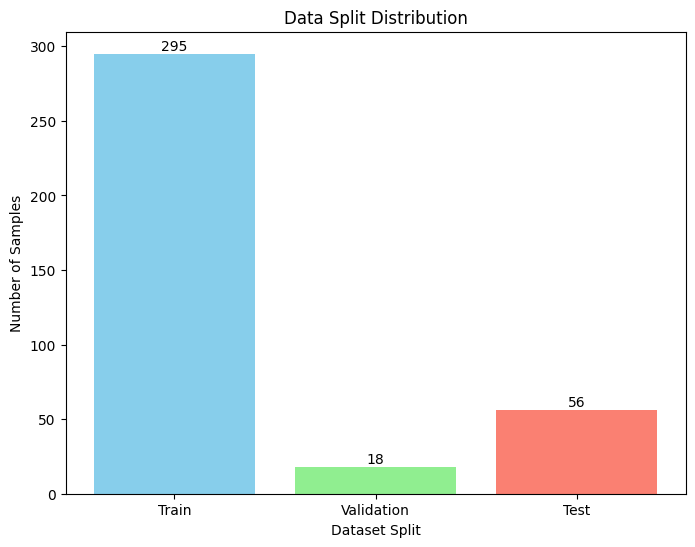

In [2]:
# Load data split
data_split_path = output_dir / "data_split.json"
with open(data_split_path, 'r') as f:
    data_split = json.load(f)

# Extract split information
train_count = len(data_split['train'])
val_count = len(data_split['val'])
test_count = len(data_split['test'])
total_count = train_count + val_count + test_count

print(f"Total samples: {total_count}")
print(f"Training samples: {train_count} ({train_count/total_count*100:.1f}%)")
print(f"Validation samples: {val_count} ({val_count/total_count*100:.1f}%)")
print(f"Test samples: {test_count} ({test_count/total_count*100:.1f}%)")

# Visualize data split
split_data = {'Train': train_count, 'Validation': val_count, 'Test': test_count}
plt.figure(figsize=(8, 6))
plt.bar(split_data.keys(), split_data.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Data Split Distribution')
plt.ylabel('Number of Samples')
plt.xlabel('Dataset Split')
for i, v in enumerate(split_data.values()):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.show()

## 📈 Training Metrics Analysis

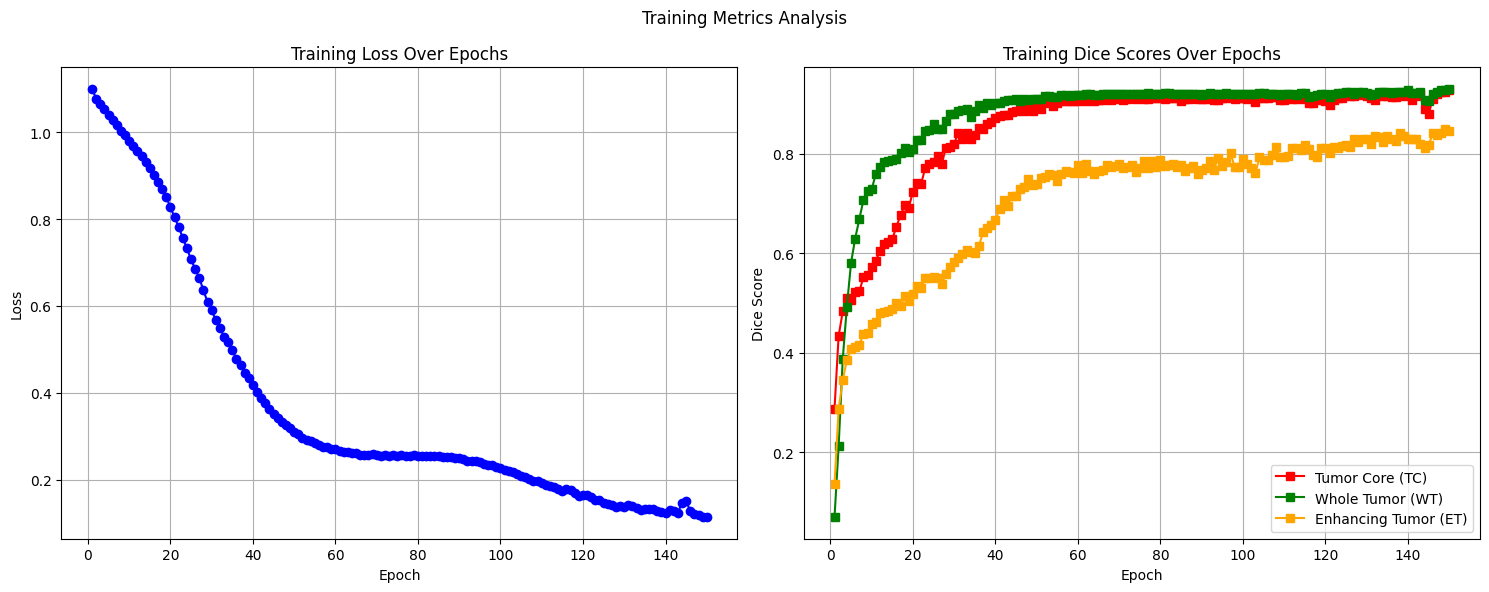

In [3]:
# Load training metrics
train_metrics_path = output_dir / "train_metrics.csv"
train_df = pd.read_csv(train_metrics_path)

# Plot training loss and dice scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Loss subplot
ax1.plot(train_df['epoch'], train_df['loss'], marker='o', linestyle='-', color='blue')
ax1.set_title('Training Loss Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)

# Dice subplot
classes = ['Tumor Core (TC)', 'Whole Tumor (WT)', 'Enhancing Tumor (ET)']
colors = ['red', 'green', 'orange']
for cls, color in zip(classes, colors):
    ax2.plot(train_df['epoch'], train_df[f'{cls}_dice'], marker='s', linestyle='-', color=color, label=cls)
ax2.set_title('Training Dice Scores Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Dice Score')
ax2.legend()
ax2.grid(True)

plt.suptitle('Training Metrics Analysis')
plt.tight_layout()
plt.show()

## 📉 EDA: Validation Metrics Analysis

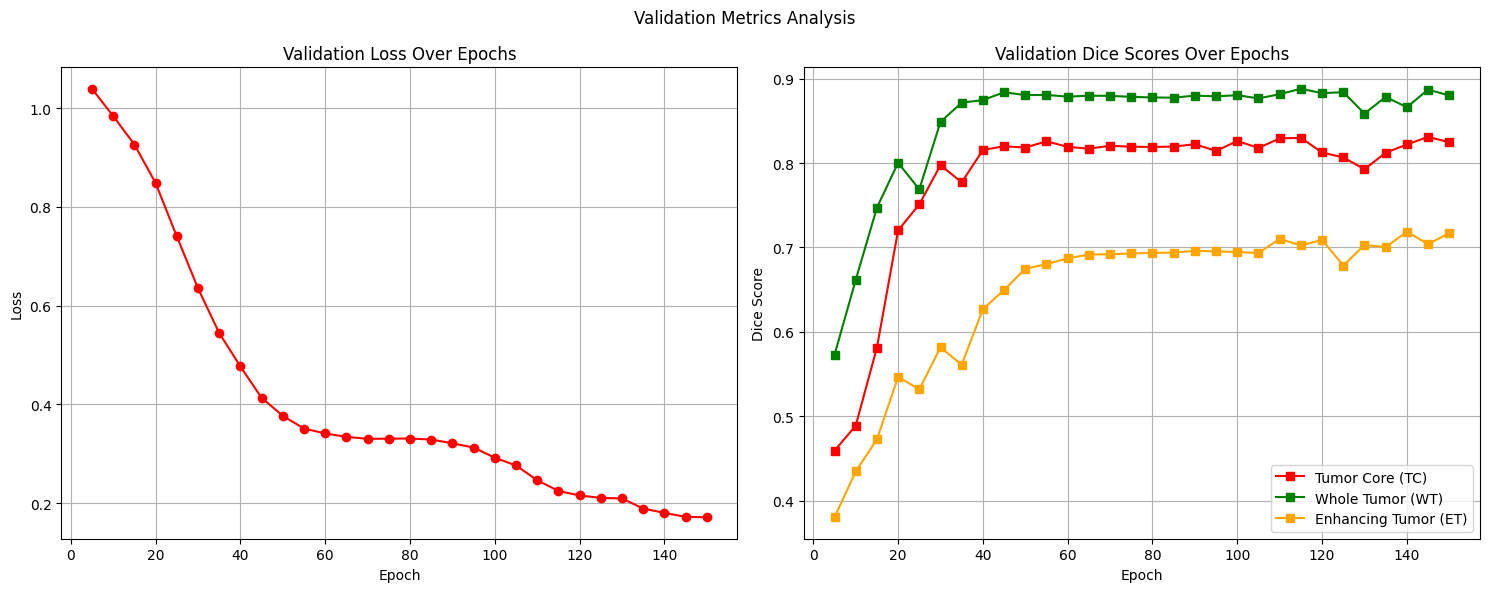

In [4]:
# Load validation metrics
val_metrics_path = output_dir / "val_metrics.csv"
val_df = pd.read_csv(val_metrics_path)

# Plot validation loss and dice scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Loss subplot
ax1.plot(val_df['epoch'], val_df['loss'], marker='o', linestyle='-', color='red')
ax1.set_title('Validation Loss Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True)

# Dice subplot
classes = ['Tumor Core (TC)', 'Whole Tumor (WT)', 'Enhancing Tumor (ET)']
colors = ['red', 'green', 'orange']
for cls, color in zip(classes, colors):
    ax2.plot(val_df['epoch'], val_df[f'{cls}_dice'], marker='s', linestyle='-', color=color, label=cls)
ax2.set_title('Validation Dice Scores Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Dice Score')
ax2.legend()
ax2.grid(True)

plt.suptitle('Validation Metrics Analysis')
plt.tight_layout()
plt.show()

## 📝 Test Metrics Analysis

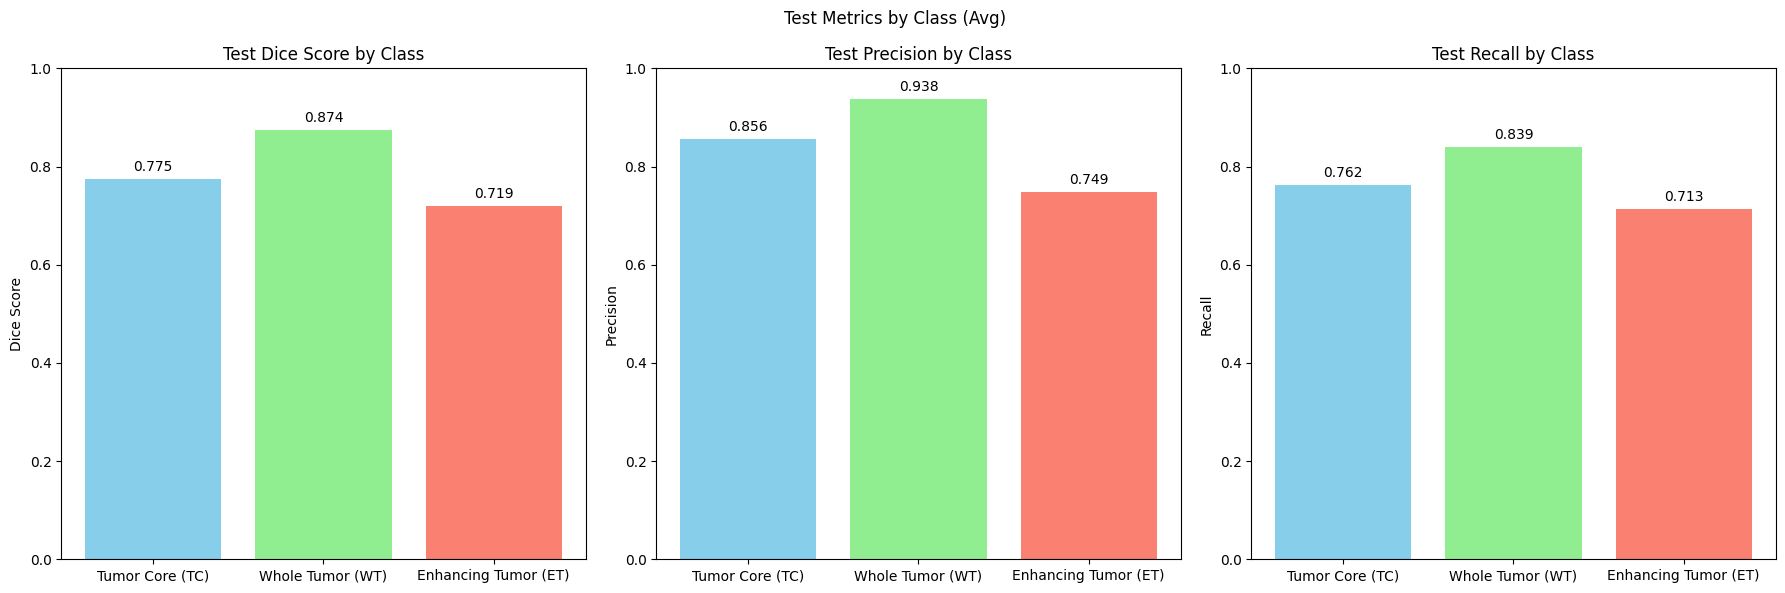

In [5]:
# Load test metrics
test_metrics_path = output_dir / "test_metrics.csv"
test_df = pd.read_csv(test_metrics_path)

test_metrics = test_df.iloc[0]

# Plot per-class test metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
metrics = ['dice', 'precision', 'recall']
titles = ['Dice Score', 'Precision', 'Recall']
colors = ['skyblue', 'lightgreen', 'salmon']

for i, metric in enumerate(metrics):
    values = [test_metrics[f'{cls}_{metric}'] for cls in classes]
    axes[i].bar(classes, values, color=colors)
    axes[i].set_title(f'Test {titles[i]} by Class')
    axes[i].set_ylabel(titles[i])
    axes[i].set_ylim(0, 1)
    for j, v in enumerate(values):
        axes[i].text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.suptitle('Test Metrics by Class (Avg)')
plt.tight_layout()
plt.show()